https://archive.ics.uci.edu/ml/datasets/Activity+Recognition+from+Single+Chest-Mounted+Accelerometer

In [48]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import LogNorm
from matplotlib.ticker import LogLocator

from sklearn.metrics import confusion_matrix

import sys
import os

sys.path.insert(0, os.path.join(os.getcwd(), "..", "kNN_NBC", "x64", "Release"))
import pynbc

In [2]:
matplotlib.rcParams['figure.figsize'] = [20, 15]

In [3]:
data_path = os.path.join('data', 'Activity Recognition from Single Chest-Mounted Accelerometer')
files = list(map(lambda i: os.path.join(data_path, f'{i}.csv'), range(1, 16)))

In [4]:
data = pd.concat([pd.read_csv(f, header=None, names=['x', 'y', 'z', 'activity']) for f in files])

In [5]:
data.describe()

,x,y,z,activity
count,1.926896e+06,1.926896e+06,1.926896e+06,1.926896e+06
mean,1.987652e+03,2.382523e+03,1.970596e+03,3.882898e+00
std,1.113578e+02,1.003151e+02,9.445893e+01,2.443402e+00
min,2.820000e+02,2.000000e+00,1.000000e+00,0.000000e+00
25%,1.904000e+03,2.337000e+03,1.918000e+03,1.000000e+00
50%,1.992000e+03,2.367000e+03,1.988000e+03,4.000000e+00
75%,2.076000e+03,2.413000e+03,2.032000e+03,7.000000e+00
max,3.828000e+03,4.095000e+03,4.095000e+03,7.000000e+00


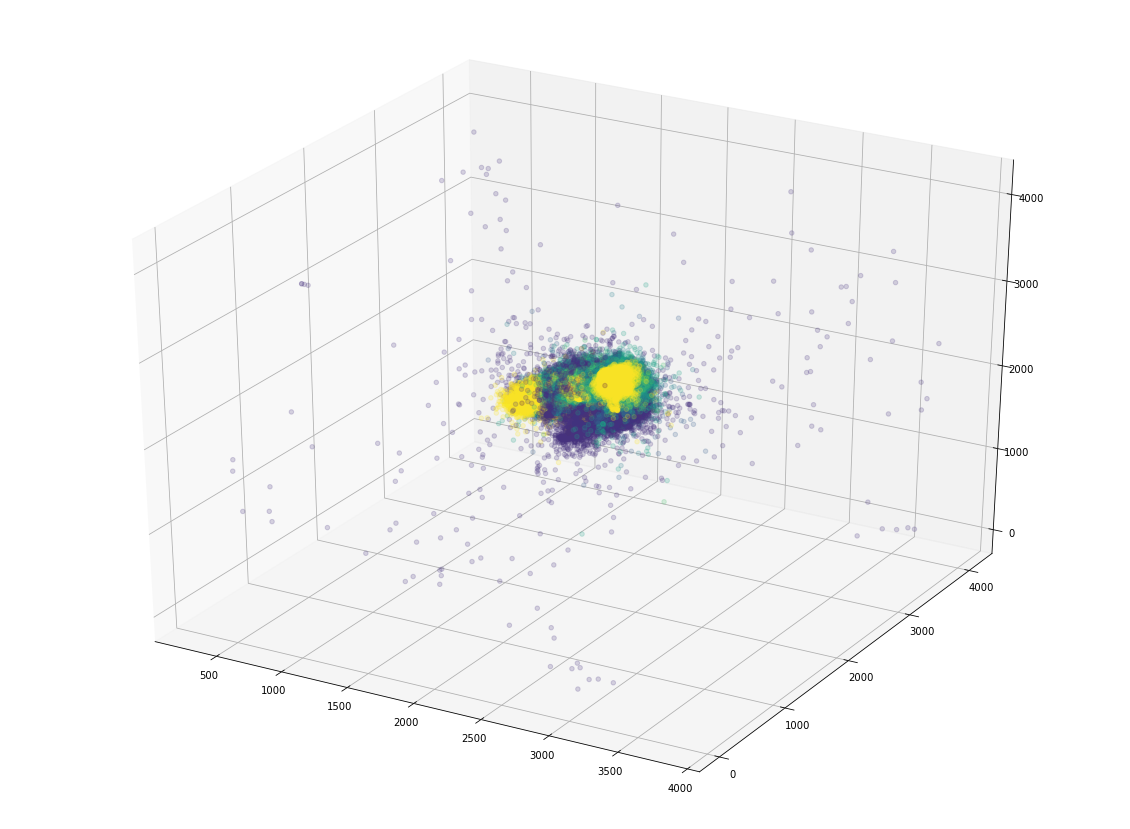

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['x'], data['y'], data['z'], c=data['activity'], marker='o', alpha=0.2)

plt.show()

In [7]:
data_features = np.array(data[['x', 'y', 'z']], dtype=np.double)
data_target = np.array(data['activity'], dtype=np.double)

In [78]:
k = int(len(data_features) ** 0.5) // 4
k
# decreased neihbours number to decrease memory usage

347

In [13]:
knn_result = pynbc.nbc_kNN(k, pynbc.MIN_VALUE, data_features, True)

In [14]:
kpnn_result = pynbc.nbc_kpNN(k, pynbc.MIN_VALUE, data_features, True)

In [15]:
import pickle
with open('rc.pickle', 'wb') as f:
    pickle.dump((kpnn_result, knn_result), f)

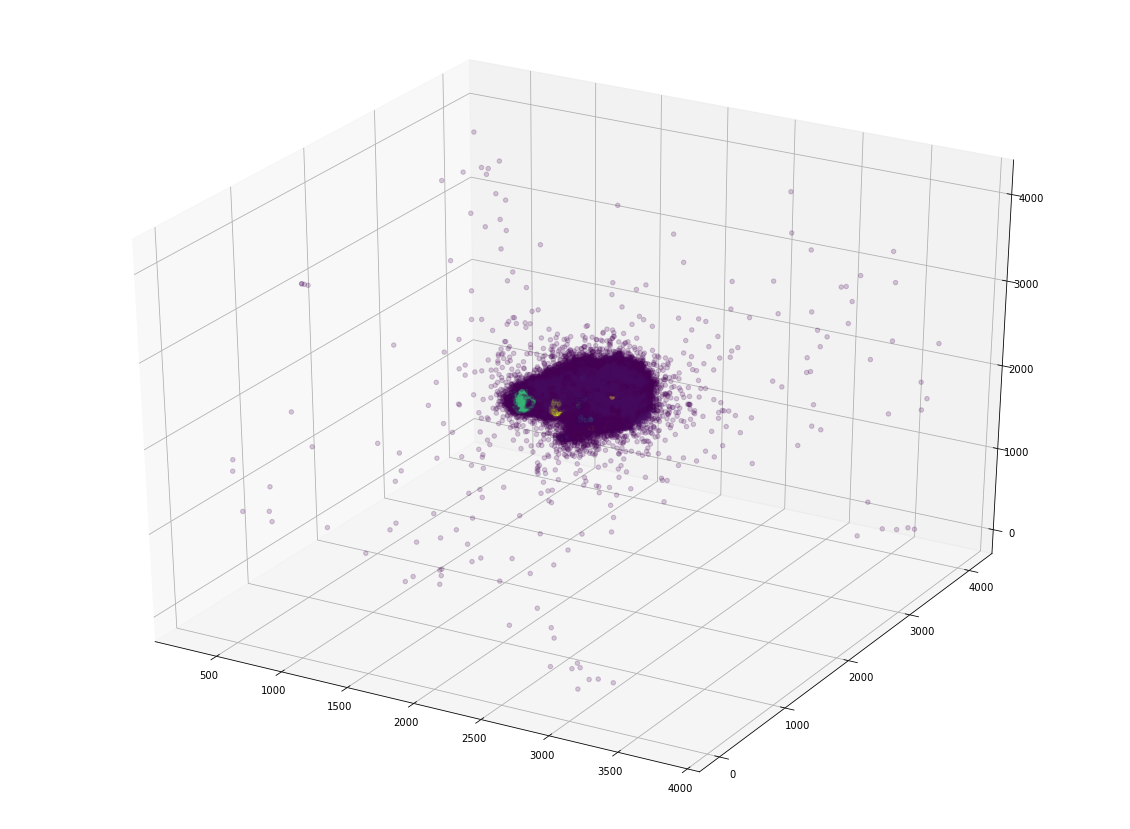

In [16]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['x'], data['y'], data['z'], c=knn_result, marker='o', alpha=0.2)

plt.show()

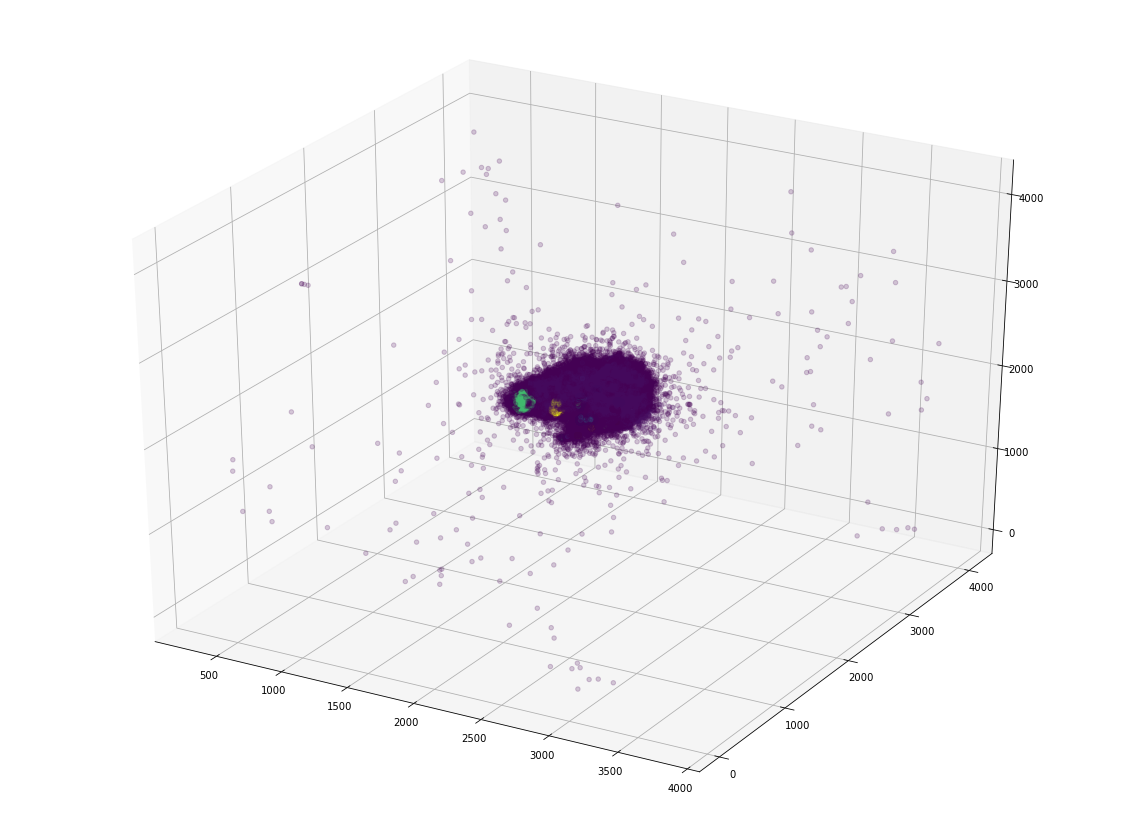

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(data['x'], data['y'], data['z'], c=kpnn_result, marker='o', alpha=0.2)

plt.show()

In [77]:
knn_result = np.array(knn_result)
kpnn_result = np.array(kpnn_result)

In [94]:
def show_cmat(results, name):
    cmat = confusion_matrix(data_target, np.array(results))

    cmat_ = cmat[:,(cmat != 0).any(axis=0)]
    cmat_ = cmat_.T
    cmat_ = cmat_[:,(cmat_ != 0).any(axis=0)]
    sns.heatmap(
        cmat_, annot=True,
        xticklabels=range(int(data_target.min()), int(data_target.max() + 1)),
        yticklabels=range(int(results.min()), int(results.max() + 1))
    )
    plt.title(name)
    plt.xlabel('Actual class')
    plt.ylabel('Group')
    plt.show()

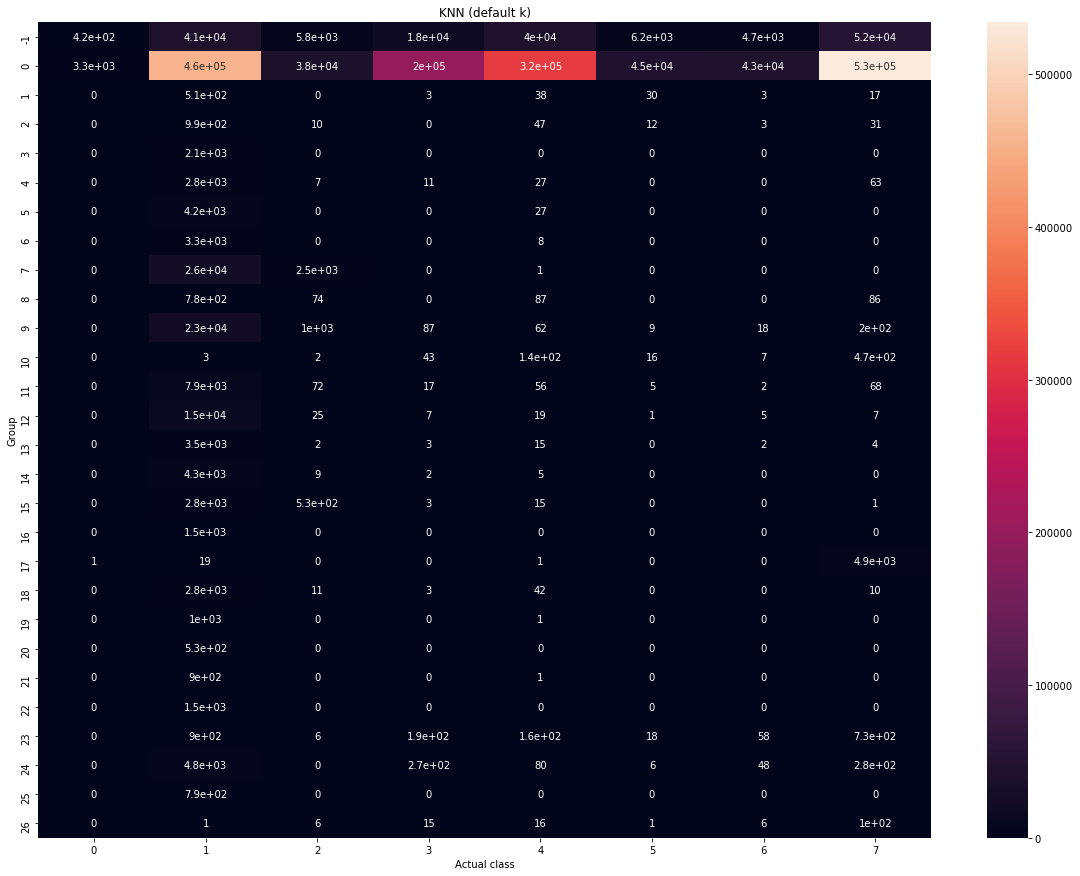

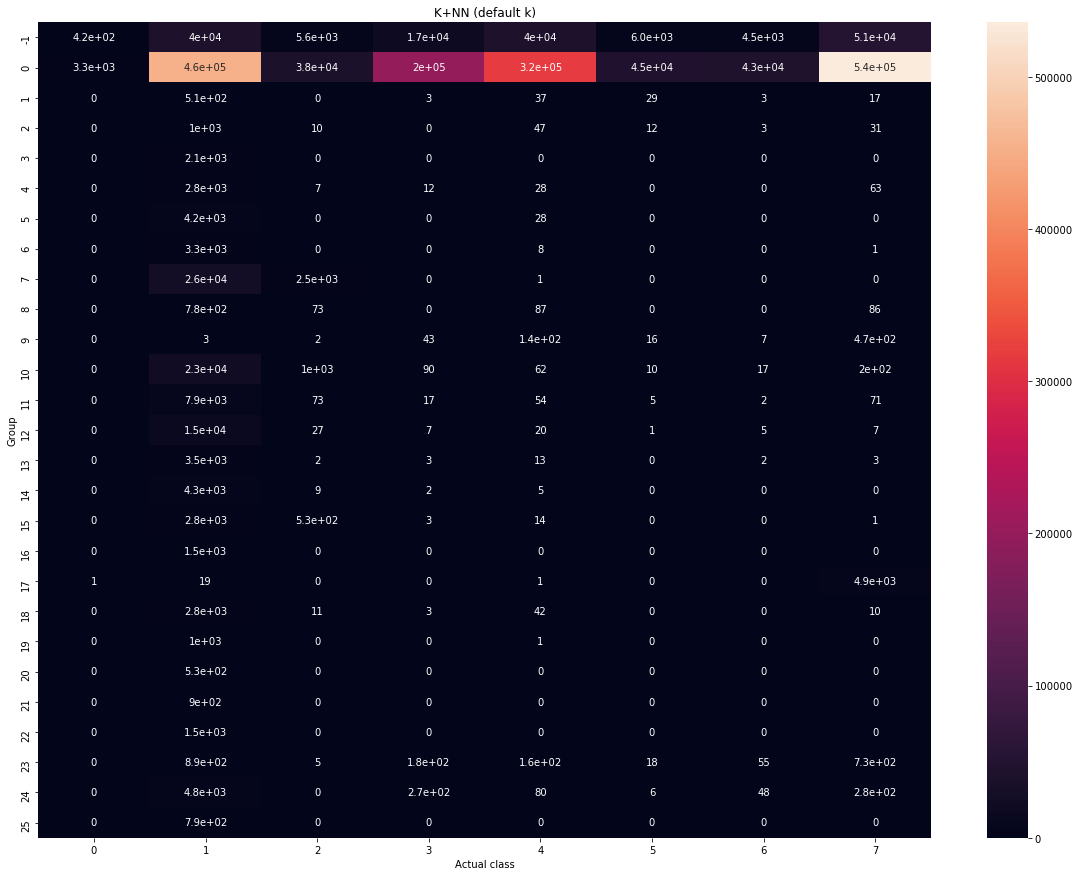

In [95]:
show_cmat(knn_result, "KNN (default k)")
show_cmat(kpnn_result, "K+NN (default k)")

In [96]:
knn_result_100 = pynbc.nbc_kNN(100, pynbc.MIN_VALUE, data_features, True)

In [97]:
kpnn_result_100 = pynbc.nbc_kpNN(100, pynbc.MIN_VALUE, data_features, True)

In [98]:
knn_result_100 = np.array(knn_result_100)
kpnn_result_100 = np.array(kpnn_result_100)

In [99]:
knn_result_100.max()

70

In [101]:
kpnn_result_100.max()

63

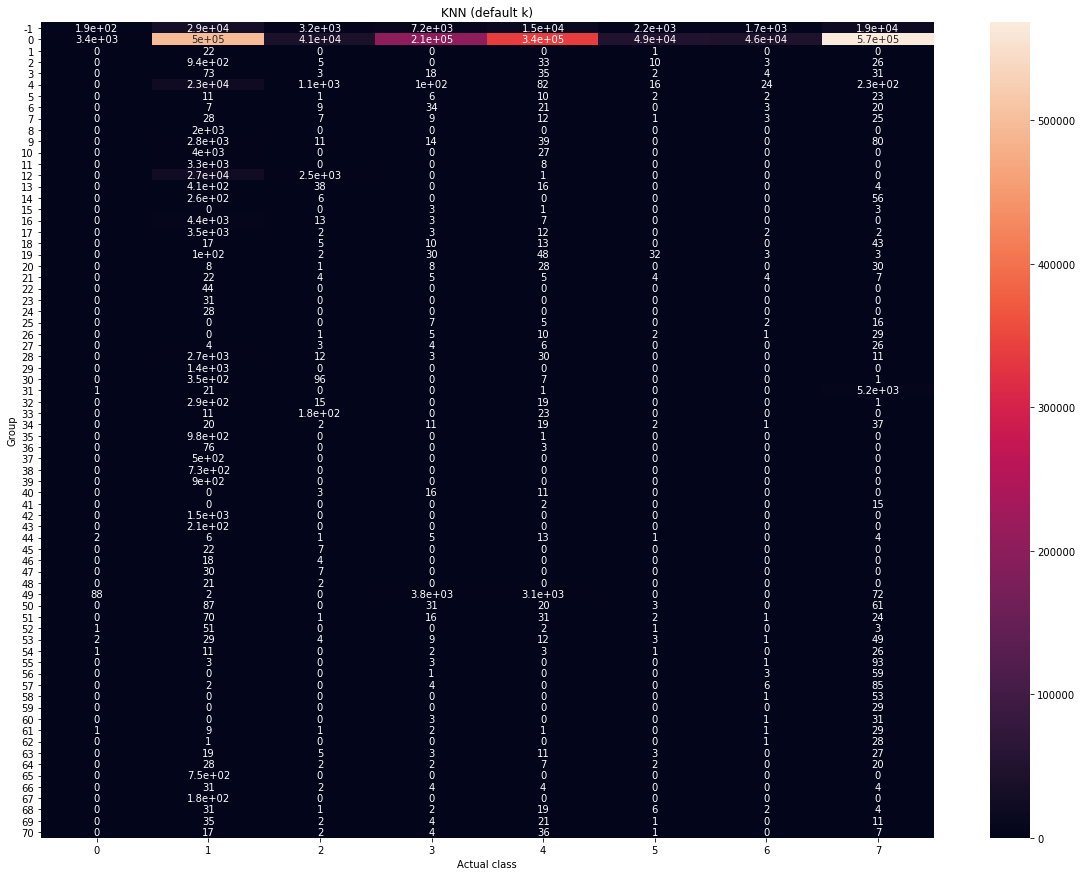

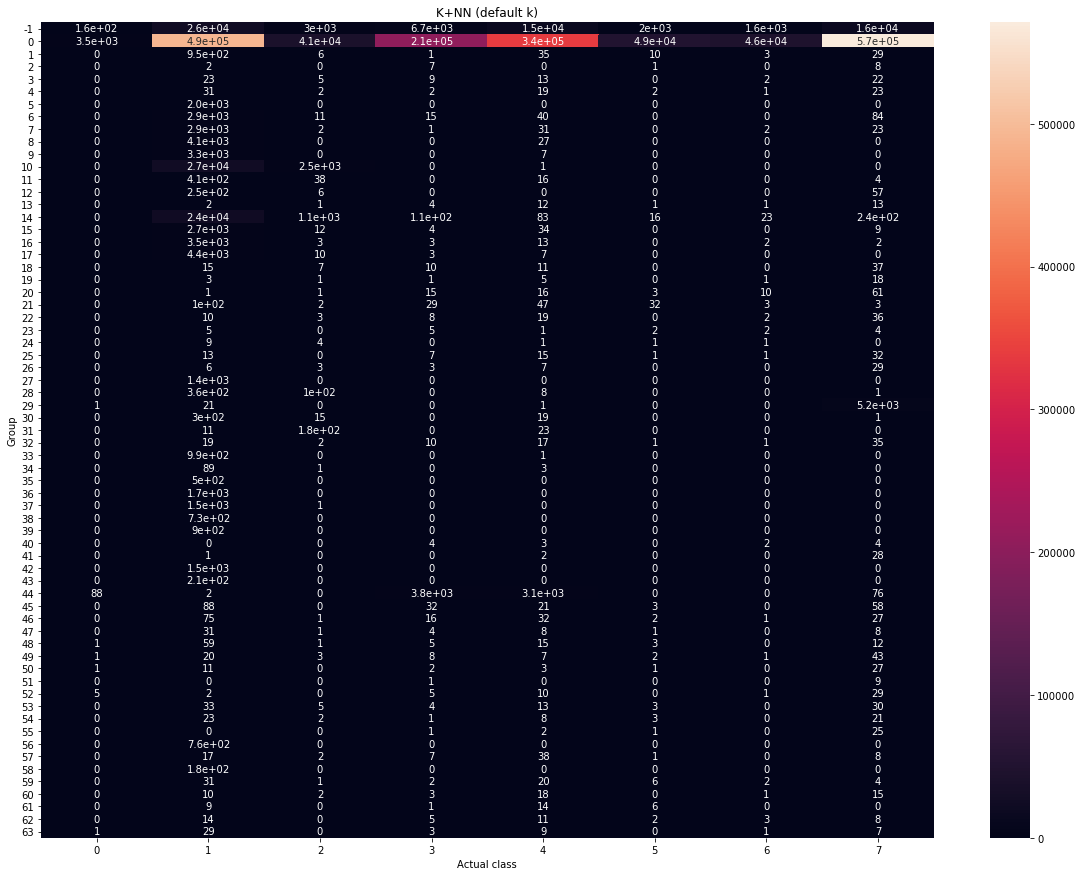

In [102]:
show_cmat(knn_result_100, "KNN (default k)")
show_cmat(kpnn_result_100, "K+NN (default k)")